# Solving Geophysics Problems With Python
### by Chris Novitsky
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import myFunctions 
import myFunctions as my
import scipy.optimize
import math as m 
import numpy as np 
import statsmodels.api as sm

## Read in UTM GPS and travel-time data for circle shots 
filename1 = 'utm.xlsx'
utm = pd.DataFrame.as_matrix(pd.read_excel(filename1, sheet_name='Sheet1'))

filename2 = 'new_arrivals_20m_1_11.xlsx'
num = pd.DataFrame.as_matrix(pd.read_excel(filename2, sheet_name='Sheet1')) 

## Correct starting angles to true north and finds angles from 0 to 360 for 
## all gps data 
xAxis = myFunctions.yAxis(utm)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Plot Time vs. Azimuth
___

Text(0.5,1,'Circle Shot')

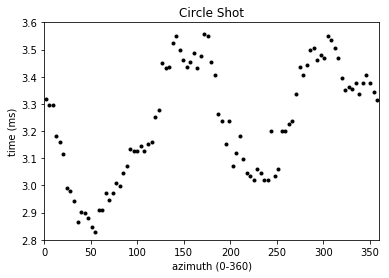

In [2]:
y, x = [], []
x = xAxis[0:95,9]
y = num[0:95,9]*100
plt.plot(x,y,'.k')
plt.axis([0, 360, 2.8, 3.6])
plt.xlabel('azimuth (0-360)')
plt.ylabel('time (ms)')
plt.title("Circle Shot")


## Make The A matrix
___

In [3]:

b = y; 
A = np.ones((95,3))
for i in range(0,95):
    A[i,0] = 1
    A[i,1] = my.cosd(2*x[i])
    A[i,2] =  my.sind(2*x[i])
print("                 A Matrix\n--------------------------------------------\n", A)


                 A Matrix
--------------------------------------------
 [[ 1.          0.65740413  0.75353819]
 [ 1.          0.55227531  0.83366179]
 [ 1.          0.4374972   0.89921977]
 [ 1.          0.31507521  0.94906671]
 [ 1.          0.18714827  0.98233168]
 [ 1.          0.0559515   0.99843349]
 [ 1.         -0.07622285  0.99709081]
 [ 1.         -0.20706545  0.97832709]
 [ 1.         -0.33429022  0.94247018]
 [ 1.         -0.45567433  0.89014657]
 [ 1.         -0.56909695  0.82227043]
 [ 1.         -0.67257639  0.7400277 ]
 [ 1.         -0.76430467  0.64485531]
 [ 1.         -0.84267912  0.5384161 ]
 [ 1.         -0.90633041  0.42256975]
 [ 1.         -0.95414641  0.29934033]
 [ 1.         -0.9852917   0.17088087]
 [ 1.         -0.99922211  0.0394358 ]
 [ 1.         -0.99569424 -0.09269828]
 [ 1.         -0.97476975 -0.22321275]
 [ 1.         -0.93681422 -0.34982728]
 [ 1.         -0.88249079 -0.47032967]
 [ 1.         -0.81274861 -0.58261453]
 [ 1.         -0.7288062  -0.68

## Least Square Fit
___

In [6]:
#%% Least Square Fit 

x_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(A),A)),np.transpose(A)),b)

A0 = x_hat[0]
A1 = x_hat[1]
B = x_hat[2]

print("                             coefficients\n-----------------------------------------------------------------------")
print(f"A0:{A0}    A1:{A1}    B:{B}")

                             coefficients
-----------------------------------------------------------------------
A0:3.23485052631579    A1:0.07404792997476407    B:-0.2406530855590311


## Plot The Regression 
___

Text(0.5,1,'Circle Shot')

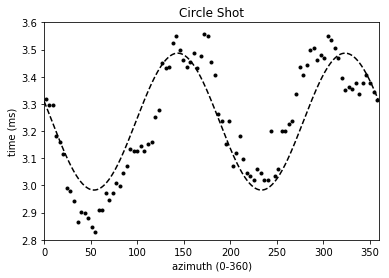

In [7]:
xpp = np.linspace(0,360, 500)
ypp = [A0 + A1*my.cosd(2*x)+B*my.sind(2*x) for x in xpp]

plt.plot(xpp,ypp,'--k')
x = xAxis[0:95,9]
y = num[0:95,9]*100
plt.plot(x,y,'.k')
plt.axis([0, 360, 2.8, 3.6])
plt.xlabel('azimuth (0-360)')
plt.ylabel('time (ms)')
plt.title("Circle Shot")


___
# Geophysical Research Letter Results
___

## Calculate Error Using Bootstrapping 
___

Optimization terminated successfully.
         Current function value: 2.336275
         Iterations: 75
         Function evaluations: 134
Optimization terminated successfully.
         Current function value: 1.638454
         Iterations: 79
         Function evaluations: 141
Optimization terminated successfully.
         Current function value: 1.668666
         Iterations: 79
         Function evaluations: 140
Optimization terminated successfully.
         Current function value: 1.846341
         Iterations: 76
         Function evaluations: 135
Optimization terminated successfully.
         Current function value: 1.651990
         Iterations: 75
         Function evaluations: 130
Optimization terminated successfully.
         Current function value: 1.912556
         Iterations: 79
         Function evaluations: 143
Optimization terminated successfully.
         Current function value: 1.654583
         Iterations: 83
         Function evaluations: 142
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 1.426314
         Iterations: 70
         Function evaluations: 124
Optimization terminated successfully.
         Current function value: 1.356206
         Iterations: 64
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 1.691551
         Iterations: 62
         Function evaluations: 119
Optimization terminated successfully.
         Current function value: 1.634931
         Iterations: 72
         Function evaluations: 131
Optimization terminated successfully.
         Current function value: 1.692954
         Iterations: 62
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 1.525067
         Iterations: 71
         Function evaluations: 123
Optimization terminated successfully.
         Current function value: 1.727925
         Iterations: 69
         Function evaluations: 121
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 1.281333
         Iterations: 78
         Function evaluations: 143
Optimization terminated successfully.
         Current function value: 1.424633
         Iterations: 65
         Function evaluations: 121
Optimization terminated successfully.
         Current function value: 1.566861
         Iterations: 70
         Function evaluations: 128
Optimization terminated successfully.
         Current function value: 1.737954
         Iterations: 74
         Function evaluations: 136
Optimization terminated successfully.
         Current function value: 1.350155
         Iterations: 80
         Function evaluations: 145
Optimization terminated successfully.
         Current function value: 1.397677
         Iterations: 77
         Function evaluations: 143
Optimization terminated successfully.
         Current function value: 1.384366
         Iterations: 79
         Function evaluations: 141
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 1.320336
         Iterations: 70
         Function evaluations: 129
Optimization terminated successfully.
         Current function value: 1.325182
         Iterations: 62
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 1.218698
         Iterations: 65
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 1.424442
         Iterations: 59
         Function evaluations: 110
Optimization terminated successfully.
         Current function value: 1.152997
         Iterations: 63
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 1.215863
         Iterations: 62
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 1.156627
         Iterations: 64
         Function evaluations: 119
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.802889
         Iterations: 78
         Function evaluations: 138
Optimization terminated successfully.
         Current function value: 0.747866
         Iterations: 69
         Function evaluations: 132
Optimization terminated successfully.
         Current function value: 0.740610
         Iterations: 73
         Function evaluations: 132
Optimization terminated successfully.
         Current function value: 0.731609
         Iterations: 76
         Function evaluations: 137
Optimization terminated successfully.
         Current function value: 0.791894
         Iterations: 75
         Function evaluations: 137
Optimization terminated successfully.
         Current function value: 0.677411
         Iterations: 79
         Function evaluations: 142
Optimization terminated successfully.
         Current function value: 0.735107
         Iterations: 73
         Function evaluations: 134
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.388374
         Iterations: 66
         Function evaluations: 124
Optimization terminated successfully.
         Current function value: 0.362734
         Iterations: 73
         Function evaluations: 129
Optimization terminated successfully.
         Current function value: 0.398773
         Iterations: 90
         Function evaluations: 153
Optimization terminated successfully.
         Current function value: 0.376539
         Iterations: 73
         Function evaluations: 133
Optimization terminated successfully.
         Current function value: 0.337233
         Iterations: 70
         Function evaluations: 127
Optimization terminated successfully.
         Current function value: 0.431924
         Iterations: 86
         Function evaluations: 155
Optimization terminated successfully.
         Current function value: 0.361593
         Iterations: 66
         Function evaluations: 123
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.583806
         Iterations: 61
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 0.580159
         Iterations: 70
         Function evaluations: 123
Optimization terminated successfully.
         Current function value: 0.580797
         Iterations: 71
         Function evaluations: 128
Optimization terminated successfully.
         Current function value: 0.626233
         Iterations: 77
         Function evaluations: 135
Optimization terminated successfully.
         Current function value: 0.538064
         Iterations: 69
         Function evaluations: 124
Optimization terminated successfully.
         Current function value: 0.536872
         Iterations: 67
         Function evaluations: 122
Optimization terminated successfully.
         Current function value: 0.599063
         Iterations: 69
         Function evaluations: 126
Optimization terminated suc

Optimization terminated successfully.
         Current function value: 0.823665
         Iterations: 81
         Function evaluations: 145
Optimization terminated successfully.
         Current function value: 0.781519
         Iterations: 76
         Function evaluations: 135
Optimization terminated successfully.
         Current function value: 0.816962
         Iterations: 73
         Function evaluations: 132
Optimization terminated successfully.
         Current function value: 0.760140
         Iterations: 79
         Function evaluations: 144
Optimization terminated successfully.
         Current function value: 0.886053
         Iterations: 70
         Function evaluations: 125
Optimization terminated successfully.
         Current function value: 0.760648
         Iterations: 79
         Function evaluations: 139
Optimization terminated successfully.
         Current function value: 0.806215
         Iterations: 69
         Function evaluations: 125
Optimization terminated suc

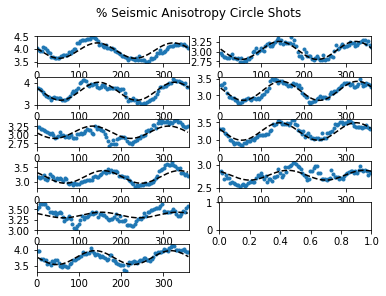

In [8]:
#%% function to find the least cos(2*theta) for the data 

def sin2fit(y, x):
    # sin least-square fit function 
    # The elements of output parameter vector, s ( b in the function ) are:

    # s(1): sine wave amplitude (in units of y)
    # s(2): phase (phase is s(2)/(2*s(3)) in units of x)
    # s(3): offset (in units of y)

    yu = max(y)
    yl = min(y)
    yr = (yu-yl)                    # Range of y
    ym = np.mean(y)
    fit = lambda b,x: b[0]*(np.sin(2*m.pi*x/180 + 2*m.pi/b[1])) + b[2]
    fcn = lambda b: sum((fit(b,x) - y)**2)
    s =  scipy.optimize.fmin(fcn, [yr,  -1,  ym]);       # Minimise Least-Squares
    xp = np.linspace(min(x),max(x),1036);
    yp = fit(s,xp);
    
    return [xp,yp,s];

#%% Plot 
plt.figure(1)
id1 = [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5];
id2 = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1];
fig, axs = plt.subplots(nrows=6, ncols=2)
fig.subplots_adjust(bottom=0.06, hspace=0.5)
fig.suptitle('% Seismic Anisotropy Circle Shots', fontsize='large')

ang, ansp, anspError, angError = [], [], [], [] 

for i in range(1,11):

   y, x = [], []
   x = xAxis[0:95,i]
   y = num[0:95,i]*100

   ax = axs[id1[i-1],id2[i-1]]
   ax.set_xlim(0, 360)
   

   ax.plot(x,y,'.')
   
   output = sin2fit(y, x) # output[0] - xfit output[1] - yfit output[2] - s 
   ax.plot(output[0],output[1],'k--')
   
   index_min  = np.argmin(output[1])
   if output[0][index_min] > 180: output[0][index_min] = output[0][index_min] - 180
   ang.append(output[0][index_min])
   
   ansp.append(abs(((max(output[1])-min(output[1])))/((max(output[1])+min(output[1])/2)))*100)
   
   ## Bootstrapping to find the error in angles and ansp
   angTemp, anspTemp = [], []
   for i in range(0,50):
     sub =np.random.permutation(95)[0:72] 
     outputTemp = sin2fit(y[sub], x[sub]) 
     indexMin  = np.argmin(outputTemp[1])
     if(outputTemp[0][indexMin]>180): outputTemp[0][indexMin] = outputTemp[0][indexMin]-180
     angTemp.append(outputTemp[0][indexMin])
     anspTemp.append(abs(((max(outputTemp[1])-min(outputTemp[1])))/((max(outputTemp[1])+min(outputTemp[1])/2)))*100)
   anspError.append(np.std(anspTemp)) 
   angError.append(np.std(angTemp))
   
ax = axs[5,1]    
ax.set_visible(False)     
plt.show()

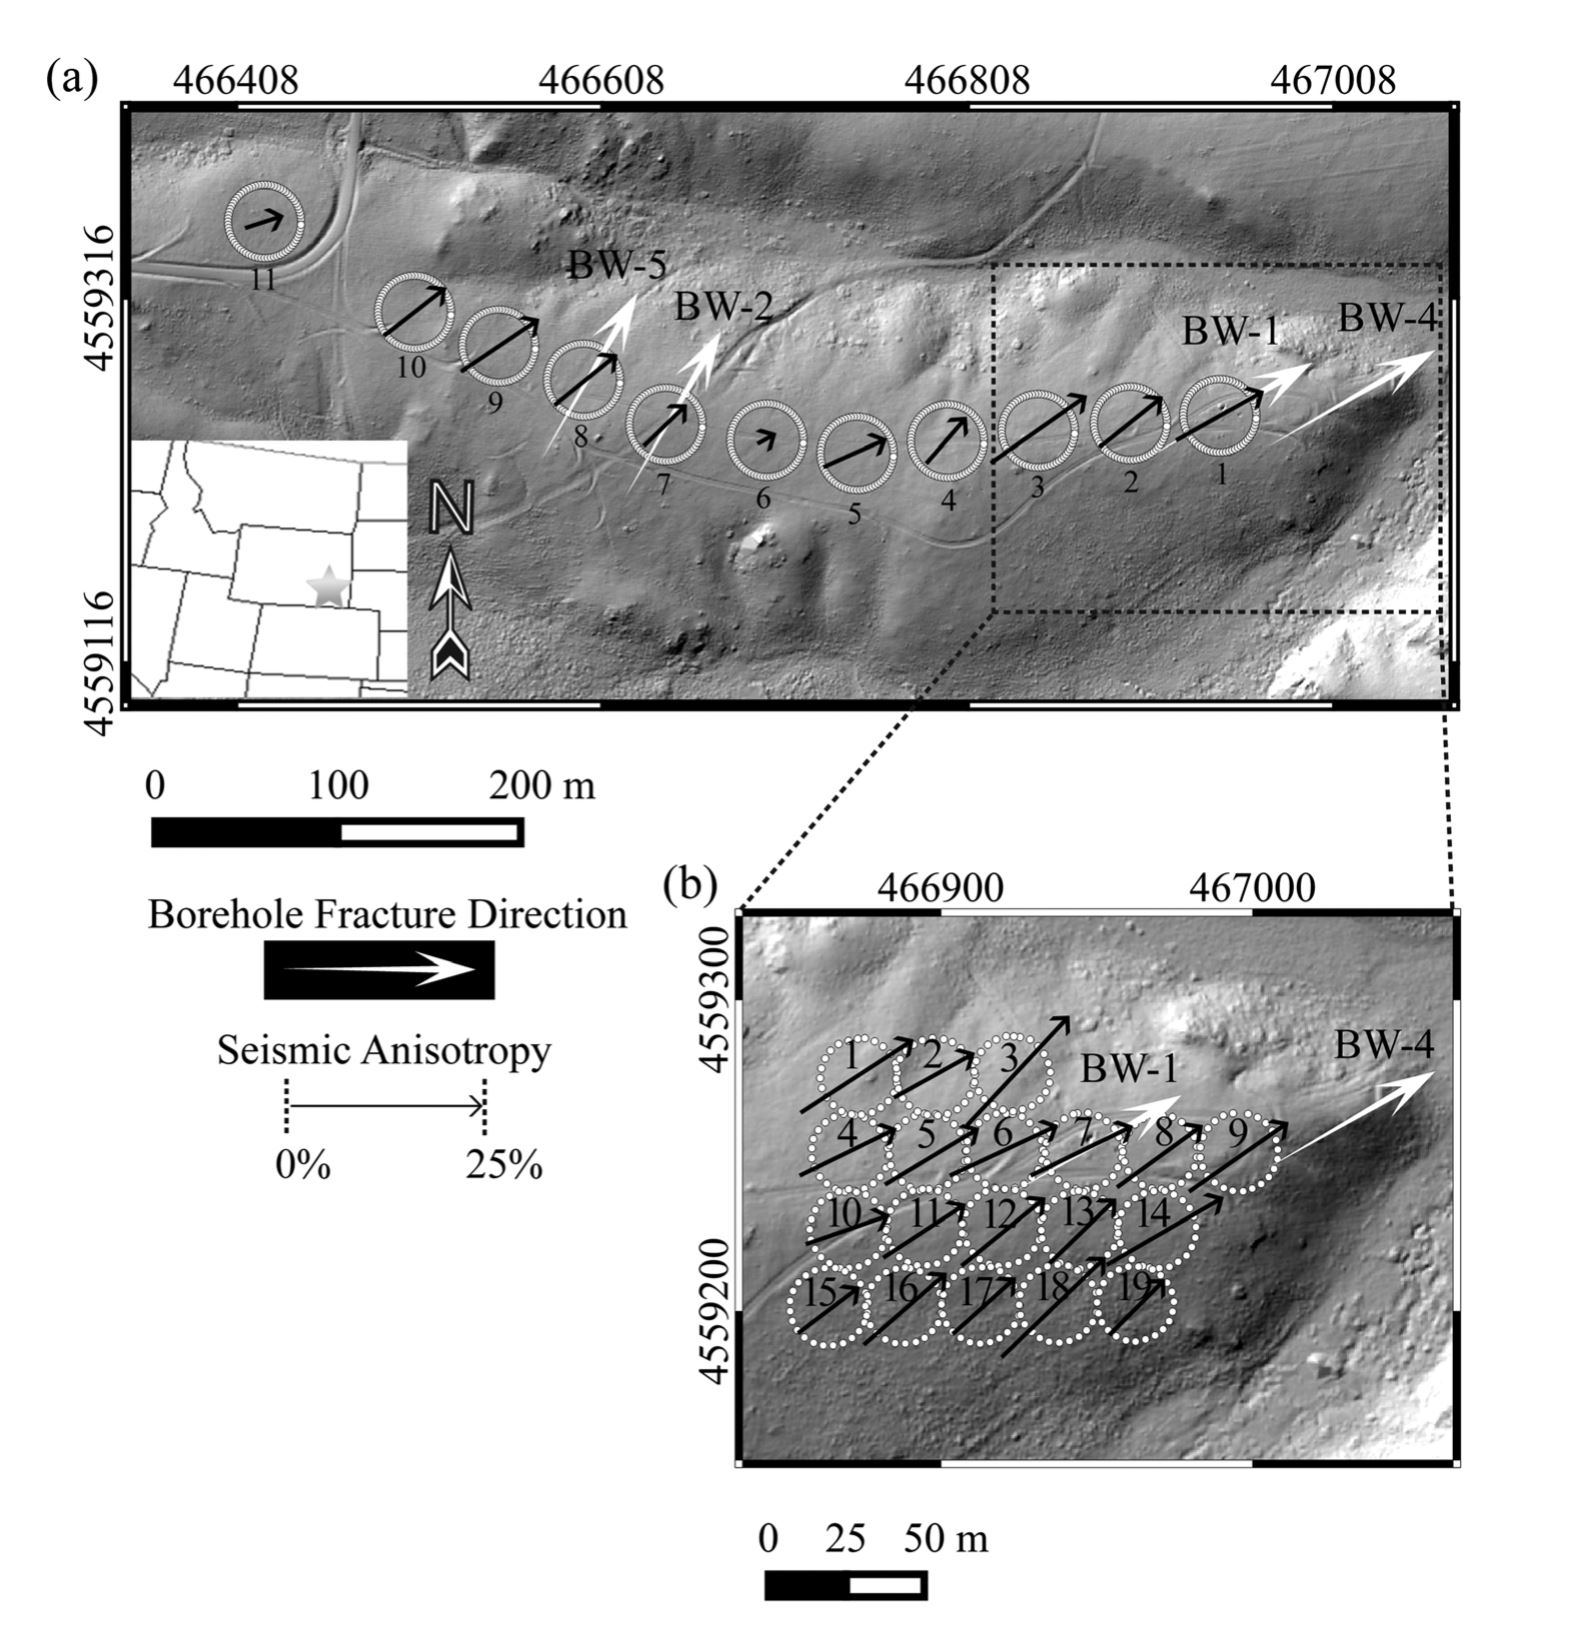

## Plot Soil Depth vs. Depth 
___

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     55.65
Date:                Wed, 11 Jul 2018   Prob (F-statistic):           7.20e-05
Time:                        19:37:28   Log-Likelihood:                -23.875
No. Observations:                   9   AIC:                             49.75
Df Residuals:                       8   BIC:                             49.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6968      0.093      7.460      0.0

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


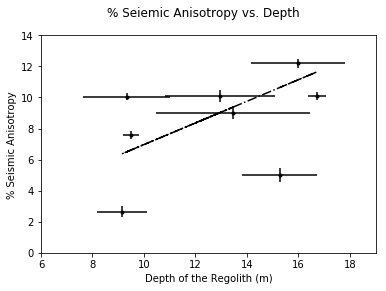

In [9]:
 #%% Calculate the error in the depth of regolith 
 
depthRegolith = [12.944,11.974,6.775,13.454,9.162,9.496,9.322, 15.981,16.712,15.273,7.937,5.357,7.484,6.932,4.446]

filename3 = 'Brady_data_10m.txt'
data = np.loadtxt(filename3)
depthStd = [np.std(np.reshape(data[:,2],(11, 72))[i]) for i in range(0,11)]

#%% remove outlier
del ansp[2]
del depthRegolith[2]
del depthStd[2]
del anspError[2]

#%% plot regolith vs. Depth 
l = 9

plt.figure(3)
plt.suptitle('% Seiemic Anisotropy vs. Depth', fontsize='large')
plt.ylabel("% Seismic Anisotropy")
plt.xlabel("Depth of the Regolith (m)")

plt.errorbar(depthRegolith[0:l], ansp[0:l], xerr= depthStd[0:l], yerr= anspError[0:l], fmt='.k')

## Ordinary Least Squares
model = sm.OLS(ansp[0:l], depthRegolith[0:l]).fit()
print(model.summary())
plt.plot(depthRegolith[0:l], model.fittedvalues, '-.k')
plt.ylim(0, 14)
plt.xlim(6, 19)
plt.show()


## Plot of depths of soil vs. %seismic anisotropy along ridge line
___

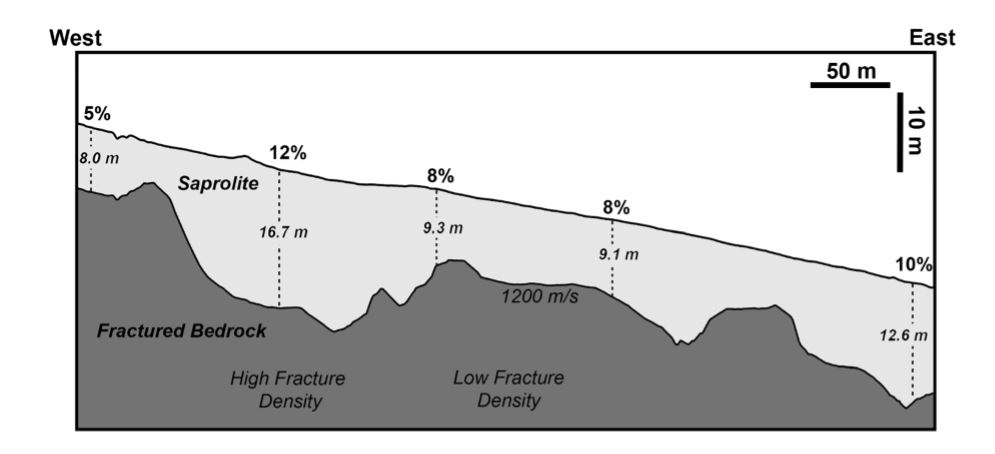